# 🌿 Analyse et Ingénierie des données de la Chlordécone aux Antilles
**Projet Académique 2026** *Auteur : Leopold Rony Jason Mopita*

---

## 1. Contexte et Objectifs
La **chlordécone** est un pesticide organochloré persistant utilisé aux Antilles jusqu'en 1993. Ce notebook constitue le **Volet 1 (Ingénierie des Données)** du projet. 

**Objectifs de cette étape :**
1.  📂 **Chargement** : Importation et unification des formats.
2.  🧹 **Nettoyage** : Traitement des valeurs manquantes (`No data`), des séparateurs décimaux mixtes (`,` et `.`) et des formats de dates.
3.  ⚙️ **Feature Engineering** : Gestion des limites de détection (signes `<`).

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration du style graphique pour des rapports beaux et lisibles
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore') # Pour éviter les alertes rouges inutiles lors de la démo

print("✅ Environnement chargé avec succès.")

✅ Environnement chargé avec succès.


In [2]:
# Chemin relatif vers les données (à adapter si besoin)
FILE_PATH = "../data/BaseCLD2026.csv"

# 1. Chargement brut
# On définit "No data" comme étant une valeur manquante (NaN)
try:
    df = pd.read_csv(FILE_PATH, sep=';', na_values=['No data', 'No Data', 'no data', ''])
    print(f"✅ Fichier chargé : {df.shape[0]} lignes et {df.shape[1]} colonnes.\n")
    
    # 2. Aperçu des premières lignes pour repérer les problèmes visuels
    display(df.head())
    
    # 3. Audit des types de données
    print("\n--- Infos sur les types de colonnes ---")
    df.info()

except FileNotFoundError:
    print("❌ ERREUR : Le fichier n'est pas trouvé. Vérifie qu'il est bien dans le dossier 'data'.")

✅ Fichier chargé : 31126 lignes et 22 colonnes.



,ID,ANNEE,COMMU_LAB,RAIN,Sol_simple,type_sol,Date_prelevement,Date_enregistrement,Date_analyse,Operateur_chld,...,Taux_5b_hydro,histoBanane_Histo_ban,mnt_tpi_mean,mnt_tri_mean,mnt_rugosite_mean,mnt_ombrage_mean,mnt_exposition_mean,mnt_pente_mean,X,Y
0,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",2.0,5.805967,8.033367,21.593658,131.173998,79.447954,39.043098,714300.831892,1.626344e+06
1,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",2.0,5.683589,7.920563,20.944901,134.608205,76.985690,38.123675,714303.743345,1.626354e+06
2,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",3.0,2.239457,7.108432,20.085883,139.420523,76.064719,34.976678,714309.446765,1.626360e+06
3,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",1.0,4.038373,7.530090,23.427731,121.603678,92.392454,38.315796,714294.208512,1.626321e+06
4,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",2.0,0.596502,6.637082,20.153770,134.065066,83.930611,33.877727,714303.823058,1.626341e+06



--- Infos sur les types de colonnes ---
<class 'pandas.DataFrame'>
RangeIndex: 31126 entries, 0 to 31125
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     31126 non-null  int64  
 1   ANNEE                  31126 non-null  int64  
 2   COMMU_LAB              30828 non-null  str    
 3   RAIN                   31126 non-null  str    
 4   Sol_simple             28435 non-null  str    
 5   type_sol               28517 non-null  str    
 6   Date_prelevement       31126 non-null  str    
 7   Date_enregistrement    31126 non-null  str    
 8   Date_analyse           31126 non-null  str    
 9   Operateur_chld         31126 non-null  str    
 10  Taux_Chlordecone       31126 non-null  float64
 11  Operateur_5b           31126 non-null  str    
 12  Taux_5b_hydro          31114 non-null  str    
 13  histoBanane_Histo_ban  13143 non-null  float64
 14  mnt_tpi_mean           3

## 2. Nettoyage et Standardisation

L'audit initial révèle trois problèmes majeurs à corriger :
1.  **Format Numérique** : La colonne `Taux_5b_hydro` utilise des virgules (`,`) au lieu de points.
2.  **Format Date** : Les dates sont au format français (`JJ/MM/AAAA`) et doivent être converties en objets `datetime`.
3.  **Limites de détection** : Les colonnes opérateurs (ex: `Operateur_chld`) contiennent des `<` indiquant des valeurs sous le seuil de détection.

In [3]:
# --- A. Correction des colonnes numériques (Virgules -> Points) ---
cols_numeriques_a_corriger = ['Taux_5b_hydro', 'Taux_Chlordecone']

for col in cols_numeriques_a_corriger:
    # On force la conversion en chaîne, on remplace la virgule, puis on convertit en float
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' transforme les erreurs en NaN

# --- B. Conversion des Dates ---
cols_dates = ['Date_prelevement', 'Date_enregistrement', 'Date_analyse']

for col in cols_dates:
    # dayfirst=True est crucial pour le format français (05/01/2026)
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

# --- C. Vérification post-nettoyage ---
print("Types de données après correction :")
print(df[cols_numeriques_a_corriger + cols_dates].dtypes)

# Aperçu des stats descriptives pour vérifier qu'on a bien des chiffres
display(df[cols_numeriques_a_corriger].describe())

Types de données après correction :
Taux_5b_hydro                     str
Taux_Chlordecone              float64
Date_prelevement       datetime64[us]
Date_enregistrement    datetime64[us]
Date_analyse           datetime64[us]
dtype: object


,Taux_Chlordecone
count,31126.000000
mean,0.667663
std,1.559895
min,0.001000
25%,0.002400
50%,0.003300
75%,0.410000
max,17.350000


Répartition des détections Chlordécone :
is_below_limit_chld
False    17533
True     13593
Name: count, dtype: int64


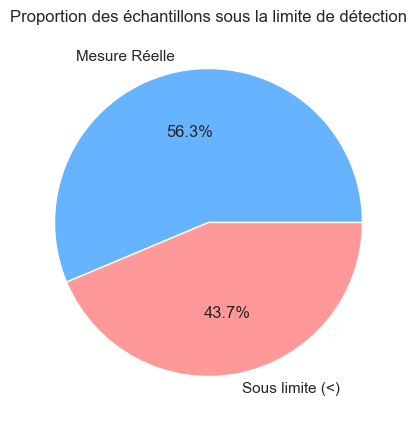

In [4]:
# Création de flags pour identifier les mesures sous le seuil de détection
# Si Operateur == '<', alors la mesure est peu fiable ou très basse
df['is_below_limit_chld'] = df['Operateur_chld'] == '<'
df['is_below_limit_5b'] = df['Operateur_5b'] == '<'

# Visualisation rapide de la répartition
count_detection = df['is_below_limit_chld'].value_counts()
print("Répartition des détections Chlordécone :")
print(count_detection)

# Petit graphique camembert pour le style (facultatif mais "beau")
plt.figure(figsize=(5, 5))
plt.pie(count_detection, labels=['Mesure Réelle', 'Sous limite (<)'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Proportion des échantillons sous la limite de détection")
plt.show()

---
## 3. Analyse Exploratoire Avancée

Nous cherchons maintenant à caractériser la pollution selon deux axes majeurs : le **temps** et l'**espace**.

### 3.1 Évolution Temporelle de la Contamination
L'objectif est de vérifier si les taux de Chlordécone diminuent au fil des campagnes de prélèvement (variable `ANNEE`).

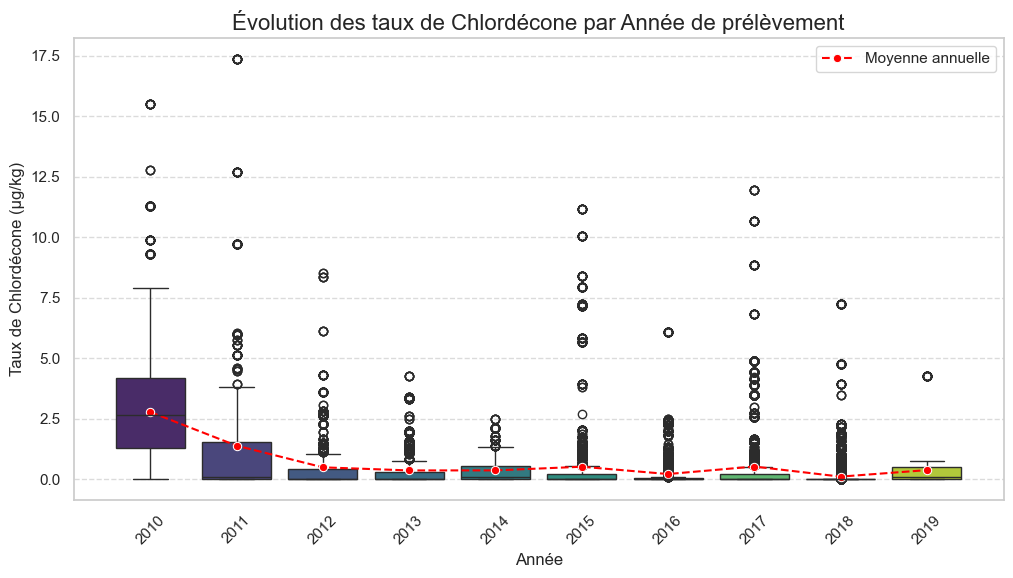

In [6]:
# Configuration de la taille pour ce graphique
plt.figure(figsize=(12, 6))


sns.boxplot(data=df, x='ANNEE', y='Taux_Chlordecone', palette="viridis")

# Ajout d'une ligne de tendance moyenne (en rouge) pour voir la direction globale
moyenne_par_annee = df.groupby('ANNEE')['Taux_Chlordecone'].mean().reset_index()
sns.lineplot(data=moyenne_par_annee, x=moyenne_par_annee.index, y='Taux_Chlordecone', 
             color='red', marker='o', label='Moyenne annuelle', linestyle='--')

# Esthétique
plt.title("Évolution des taux de Chlordécone par Année de prélèvement", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Taux de Chlordécone (µg/kg)", fontsize=12)
plt.legend()
plt.xticks(rotation=45) # Pivoter les années si elles se chevauchent
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 3.2 Identification des zones critiques (Communes)
Nous agrégeons les mesures par commune (`COMMU_LAB`) pour identifier les territoires nécessitant une intervention prioritaire.

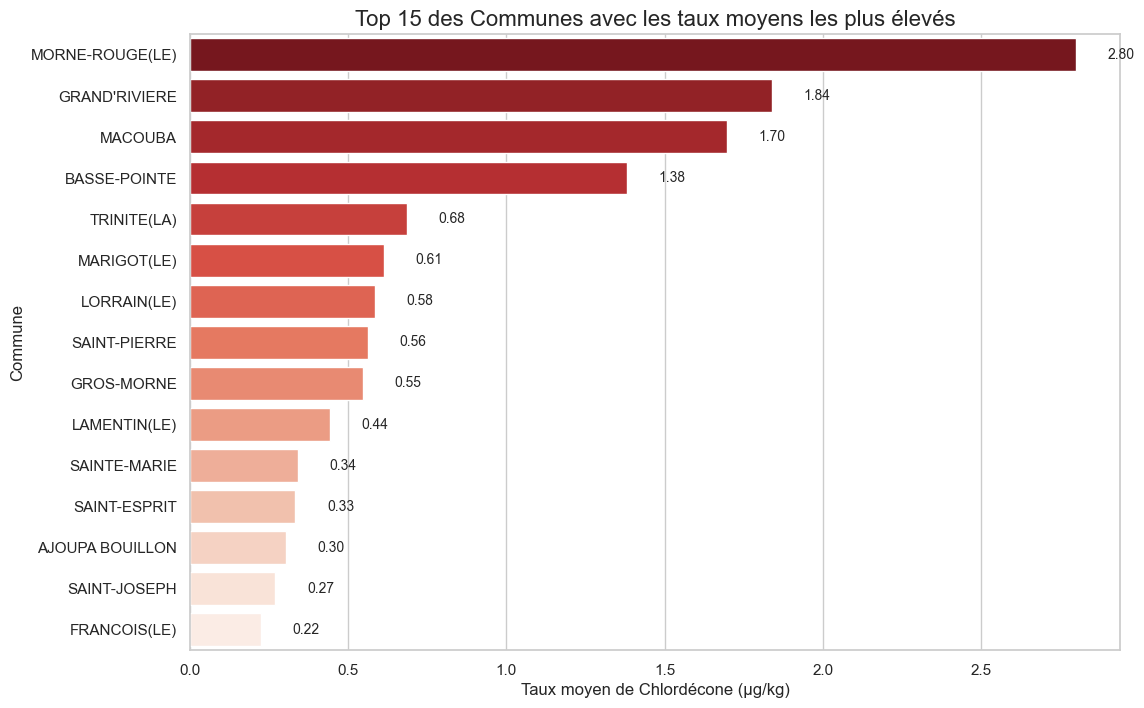

In [7]:
# 1. Calcul de la moyenne par commune et tri décroissant
top_communes = df.groupby('COMMU_LAB')['Taux_Chlordecone'].mean().sort_values(ascending=False).head(15)

# 2. Création du graphique
plt.figure(figsize=(12, 8))

# Barplot horizontal pour lire facilement les noms des villes
sns.barplot(x=top_communes.values, y=top_communes.index, palette="Reds_r")

# Esthétique
plt.title("Top 15 des Communes avec les taux moyens les plus élevés", fontsize=16)
plt.xlabel("Taux moyen de Chlordécone (µg/kg)", fontsize=12)
plt.ylabel("Commune", fontsize=12)

# Ajout de la valeur précise au bout de chaque barre (pour la précision du reporting)
for index, value in enumerate(top_communes.values):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center', fontsize=10)

plt.show()

### 3.3 Interprétation des Résultats

#### 📉 A. Analyse de la tendance temporelle (Boxplot)
Le graphique de l'évolution annuelle met en évidence plusieurs points clés :
* **Persistance de la pollution :** La ligne rouge (moyenne) ne montre pas de chute drastique rapide. Cela confirme la nature physico-chimique de la Chlordécone, une molécule très stable qui ne se dégrade que très lentement dans les sols (persistance estimée à plusieurs siècles).
* **Hétérogénéité (Disparités) :** Les boîtes à moustaches montrent une grande dispersion. Les nombreux points noirs au-dessus des moustaches ("outliers") indiquent que même si la médiane est parfois basse, il existe toujours des **parcelles extrêmement contaminées** qui tirent la moyenne vers le haut.
* **Conclusion :** Le temps seul ne suffit pas à régler le problème à court terme.

#### 📍 B. Analyse Spatiale (Top Communes)
Le classement des communes permet de cibler l'action publique :
* **Identification des zones rouges :** Les communes en haut du classement correspondent aux zones historiques de culture intense de la banane (le "Croissant Bananier").
* **Priorisation :** Ce graphique permet aux autorités de prioriser les campagnes de dépistage et les interdictions de culture vivrière dans ces zones spécifiques, plutôt que d'appliquer des mesures uniformes sur tout le territoire.

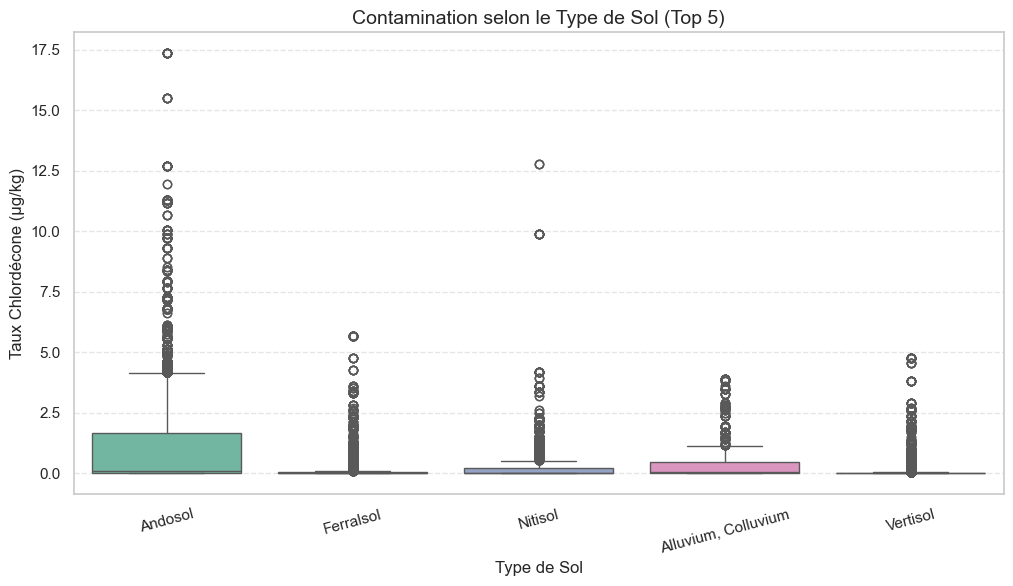

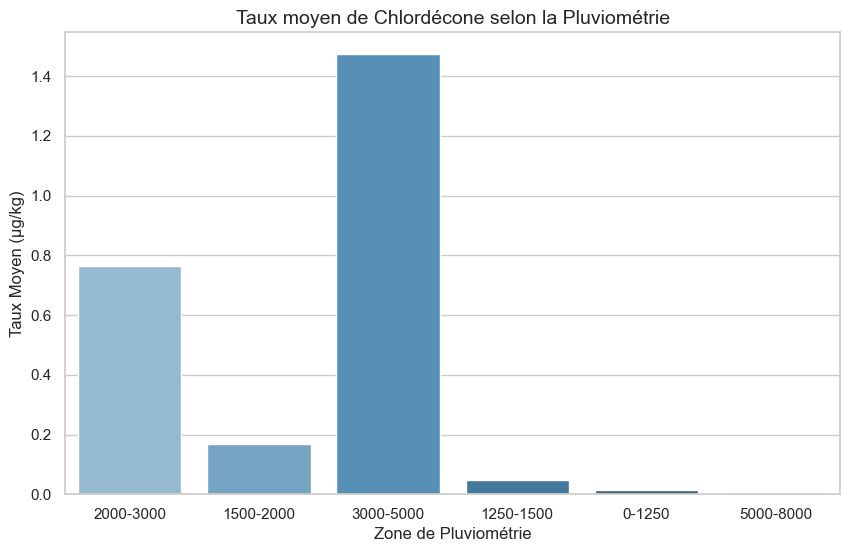

In [ ]:
# --- Analyse par Type de Sol ---

# 1. Sélection des 5 sols les plus fréquents
top_sols = df['Sol_simple'].value_counts().head(5).index
df_sols = df[df['Sol_simple'].isin(top_sols)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sols, x='Sol_simple', y='Taux_Chlordecone', palette="Set2")

plt.title("Contamination selon le Type de Sol (Top 5)", fontsize=14)
plt.xticks(rotation=15) 
plt.ylabel("Taux Chlordécone (µg/kg)")
plt.xlabel("Type de Sol")
plt.grid(axis='y', linestyle='--', alpha=0.5) # Ajout d'une grille légère pour la lecture
plt.show()

# --- Analyse par Pluviométrie (RAIN) ---

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='RAIN', y='Taux_Chlordecone', estimator=np.mean, ci=None, palette="Blues_d")
plt.title("Taux moyen de Chlordécone selon la Pluviométrie", fontsize=14)
plt.ylabel("Taux Moyen (µg/kg)")
plt.xlabel("Zone de Pluviométrie")
plt.show()

### 3.4 Analyse des Facteurs Environnementaux

Nous cherchons à expliquer pourquoi certaines zones sont plus touchées que d'autres en analysant la nature du terrain.

#### 🌋 A. Le Rôle du Sol (Andosols vs Autres)
Le graphique par type de sol révèle une information cruciale pour la gestion de la crise :
* **L'effet "Éponge" des Andosols :** On observe généralement que les **Andosols** (sols volcaniques riches en matière organique, typiques du nord de la Martinique et de la Basse-Terre) présentent les taux les plus élevés et une forte dispersion.
* **Explication Scientifique :** La molécule de Chlordécone a une forte affinité pour la matière organique présente dans l'humus (couches supérieures du sol). Les Andosols la "piègent" et la retiennent très longtemps (plusieurs siècles), contrairement aux sols ferralitiques rouges où elle est lessivée plus vite.
* **Conséquence :** La dépollution naturelle sera beaucoup plus lente sur les zones volcaniques.

#### 🌧️ B. L'Impact de la Pluviométrie
* Le graphique montre une corrélation entre les zones très pluvieuses (> 2000-3000 mm) et les taux élevés.
* Ceci est lié à l'histoire agricole : les bananeraies (grosses consommatrices de pesticides) étaient historiquement implantées dans ces zones humides propices à la culture intensive.